In [1]:
from os import chdir
chdir('/Users/lananhnguyen/Desktop/thesis/thesis_code')
import main.packages.unchain_chain as chain
import main.packages.mine_generic as mine_g
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
import re
from dieboldmariano import dm_test


In [2]:
date_range = pd.date_range(start=mine_g.train_test_split_date + pd.DateOffset(months=1), end=mine_g.max_X_date, freq='M')
num_model = 9

In [8]:
cat_short = 'food'
forecast_df_cat = pd.read_csv(f"data/forecast_results/{cat_short}_forecast.csv")

forecast_df_cat.set_index(date_range, inplace=True)

return_cols = [col for col in forecast_df_cat.columns if cat_short in col]
forecast_df_cat = forecast_df_cat.loc[:, return_cols]

yoy_real = pd.read_csv(f"data/preprocessed/{cat_short}_yoy_infl.csv", parse_dates=True, index_col='date')
yoy_real_test = yoy_real[(yoy_real.index > mine_g.train_test_split_date) & (yoy_real.index <= mine_g.max_X_date)]

rmse = []

for h in [1, 2, 3]:
    h_cols = []

    for col in forecast_df_cat.columns:
        if col.endswith(str(h)):
            h_cols.append(col)
    forecast_df_h = forecast_df_cat[h_cols]
    
    for col in [ col for col in forecast_df_h.columns if "ols" not in col]:
        print(col)
        print(dm_test(yoy_real_test.iloc[:, 0], forecast_df_h[col], forecast_df_h.loc[:, f'ols_{cat_short}_h_{h}'], h = h, harvey_correction=True))


    for col in forecast_df_h.columns:
        rmse_here = np.sqrt(mean_squared_error(forecast_df_h[col], yoy_real_test))
        rmse.append(rmse_here)


def get_first_part(col_name, separator='_h'):
    return col_name.split(separator)[0]

new_col_names = [get_first_part(col) for col in forecast_df_h.columns]


rmse = pd.DataFrame(rmse)
rmse = pd.DataFrame(rmse.values.reshape(3, num_model), columns=new_col_names, index=[f'h_{h}' for h in [1, 2, 3]])
#rmse.to_csv(f"data/report_rmse/{cat_short}.csv")

prc_food_h_1
(-2.672201632171722, 0.009068961160103962)
xgb_food_h_1
(2.9529759227421226, 0.004092377873169372)
ridge_food_h_1
(-2.907606023229412, 0.004670445347421725)
lasso_food_h_1
(2.239902340872973, 0.027770514003182277)
cb_ridge_prc_food_h_1
(-3.565695015777423, 0.0006053525487338486)
cb_ridge_prc_lasso_food_h_1
(-2.8177644630789325, 0.0060429603446027986)
cb_ridge_lasso_food_h_1
(-1.3033603512331104, 0.19605566859315215)
xgb_pca_food_h_1
(2.7406957637254337, 0.007505348137012022)
prc_food_h_2
(-1.7239689222087, 0.08843636899010199)
xgb_food_h_2
(1.7344280155628728, 0.08655458887067825)
ridge_food_h_2
(-1.8286594788031194, 0.07104265251032901)
lasso_food_h_2
(-1.2992786810315102, 0.1974458169033113)
cb_ridge_prc_food_h_2
(-1.9468392750039771, 0.05493638428464145)
cb_ridge_prc_lasso_food_h_2
(-1.8445015729597085, 0.06867753476901682)
cb_ridge_lasso_food_h_2
(-1.674114839831549, 0.09787258875372251)
xgb_pca_food_h_2
(1.7477197094799846, 0.08421080243227251)
prc_food_h_3
(-1.304971

In [4]:
rmse

,prc_food,xgb_food,ols_food,ridge_food,lasso_food,cb_ridge_prc_food,cb_ridge_prc_lasso_food,cb_ridge_lasso_food,xgb_pca_food
h_1,0.715802,1.862163,0.890646,0.702988,1.005597,0.680822,0.757781,0.827458,1.295857
h_2,1.155373,2.467842,1.479376,0.920985,1.203757,0.976956,1.031246,1.039250,1.978756
h_3,1.596160,2.438006,2.004703,1.049979,1.371932,1.248999,1.270149,1.192079,2.081886


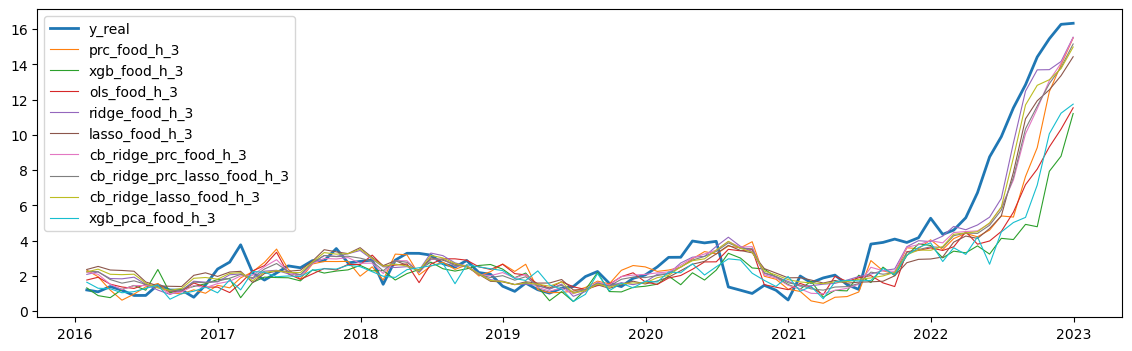

In [5]:
plt.figure(figsize=(14, 4))
plt.plot(yoy_real_test, label = "y_real", linewidth = 2)
for col in forecast_df_h.columns:
    plt.plot(forecast_df_h[col], label = col, linewidth = 0.8)
plt.legend()
plt.show()


In [6]:
rmse_comparative = [round(rmse[col]/rmse['ols_food'], 2) for col in rmse.columns]
rmse_comparative

[h_1    0.80
 h_2    0.78
 h_3    0.80
 dtype: float64,
 h_1    2.09
 h_2    1.67
 h_3    1.22
 dtype: float64,
 h_1    1.0
 h_2    1.0
 h_3    1.0
 Name: ols_food, dtype: float64,
 h_1    0.79
 h_2    0.62
 h_3    0.52
 dtype: float64,
 h_1    1.13
 h_2    0.81
 h_3    0.68
 dtype: float64,
 h_1    0.76
 h_2    0.66
 h_3    0.62
 dtype: float64,
 h_1    0.85
 h_2    0.70
 h_3    0.63
 dtype: float64,
 h_1    0.93
 h_2    0.70
 h_3    0.59
 dtype: float64,
 h_1    1.45
 h_2    1.34
 h_3    1.04
 dtype: float64]

In [7]:
rmse.to_csv(f"data/report_rmse/{cat_short}.csv")

---------

In [10]:
cat_short = 'energy'
forecast_df_cat = pd.read_csv(f"data/forecast_results/{cat_short}_forecast.csv")

forecast_df_cat.set_index(date_range, inplace=True)

return_cols = [col for col in forecast_df_cat.columns if cat_short in col]
forecast_df_cat = forecast_df_cat.loc[:, return_cols]

yoy_real = pd.read_csv(f"data/preprocessed/{cat_short}_yoy_infl.csv", parse_dates=True, index_col='date')
yoy_real_test = yoy_real[(yoy_real.index > mine_g.train_test_split_date) & (yoy_real.index <= mine_g.max_X_date)]

rmse = []

for h in [1, 2, 3]:
    h_cols = []

    for col in forecast_df_cat.columns:
        if col.endswith(str(h)):
            h_cols.append(col)
    forecast_df_h = forecast_df_cat[h_cols]
    
    for col in [ col for col in forecast_df_h.columns if "ols" not in col]:
        print(col)
        print(dm_test(yoy_real_test.iloc[:, 0], forecast_df_h[col], forecast_df_h.loc[:, f'ols_{cat_short}_h_{h}'], h = h, harvey_correction=True))

    for col in forecast_df_h.columns:
        rmse_here = np.sqrt(mean_squared_error(forecast_df_h[col], yoy_real_test))
        rmse.append(rmse_here)


def get_first_part(col_name, separator='_h'):
    return col_name.split(separator)[0]

new_col_names = [get_first_part(col) for col in forecast_df_h.columns]
rmse = pd.DataFrame(rmse)
rmse = pd.DataFrame(rmse.values.reshape(3, num_model), columns=new_col_names, index=[f'h_{h}' for h in [1, 2, 3]])

prc_energy_h_1
(0.5277933465754704, 0.5990509615207178)
xgb_energy_h_1
(2.743547298017864, 0.007445935961637639)
ridge_energy_h_1
(1.445949231952214, 0.1519570404436703)
lasso_energy_h_1
(1.309731091654549, 0.19390051428979382)
cb_ridge_prc_energy_h_1
(0.7957010731627603, 0.42847560634311055)
cb_ridge_prc_lasso_energy_h_1
(0.928859140961179, 0.35565559357336807)
cb_ridge_lasso_energy_h_1
(1.3768822181349174, 0.17225118962701325)
xgb_pca_energy_h_1
(2.5549998004497483, 0.012443768280239638)
prc_energy_h_2
(0.08276246554624206, 0.9342396863856061)
xgb_energy_h_2
(1.5281893300567042, 0.13026772086420035)
ridge_energy_h_2
(0.4584539935189064, 0.6478244776936253)
lasso_energy_h_2
(0.2984842851216414, 0.7660795566327312)
cb_ridge_prc_energy_h_2
(0.11750099115397468, 0.90674693553878)
cb_ridge_prc_lasso_energy_h_2
(0.1526763378822309, 0.8790240694465198)
cb_ridge_lasso_energy_h_2
(0.3778882730349662, 0.7064782747719789)
xgb_pca_energy_h_2
(0.9050315760255244, 0.3680682623910162)
prc_energy_h_

In [12]:

rmse.to_csv(f"data/report_rmse/{cat_short}.csv")

In [11]:
rmse

,prc_energy,xgb_energy,ols_energy,ridge_energy,lasso_energy,cb_ridge_prc_energy,cb_ridge_prc_lasso_energy,cb_ridge_lasso_energy,xgb_pca_energy
h_1,3.488918,4.766152,3.331470,3.835047,3.712284,3.569062,3.601161,3.768922,4.016345
h_2,4.993943,5.722806,4.944986,5.372019,5.168972,5.030998,5.057249,5.262010,5.116988
h_3,6.039753,6.657155,6.269531,6.069338,5.913817,5.887988,5.876274,5.965113,5.884772


In [13]:
rmse_comparative = [round(rmse[col]/rmse[f'ols_{cat_short}'], 2) for col in rmse.columns]
rmse_comparative

[h_1    1.05
 h_2    1.01
 h_3    0.96
 dtype: float64,
 h_1    1.43
 h_2    1.16
 h_3    1.06
 dtype: float64,
 h_1    1.0
 h_2    1.0
 h_3    1.0
 Name: ols_energy, dtype: float64,
 h_1    1.15
 h_2    1.09
 h_3    0.97
 dtype: float64,
 h_1    1.11
 h_2    1.05
 h_3    0.94
 dtype: float64,
 h_1    1.07
 h_2    1.02
 h_3    0.94
 dtype: float64,
 h_1    1.08
 h_2    1.02
 h_3    0.94
 dtype: float64,
 h_1    1.13
 h_2    1.06
 h_3    0.95
 dtype: float64,
 h_1    1.21
 h_2    1.03
 h_3    0.94
 dtype: float64]

--------

In [15]:
cat_short = 'neig'
forecast_df_cat = pd.read_csv(f"data/forecast_results/{cat_short}_forecast.csv")

forecast_df_cat.set_index(date_range, inplace=True)

return_cols = [col for col in forecast_df_cat.columns if cat_short in col]
forecast_df_cat = forecast_df_cat.loc[:, return_cols]

yoy_real = pd.read_csv(f"data/preprocessed/{cat_short}_yoy_infl.csv", parse_dates=True, index_col='date')
yoy_real_test = yoy_real[(yoy_real.index > mine_g.train_test_split_date) & (yoy_real.index <= mine_g.max_X_date)]

rmse = []

for h in [1, 2, 3]:
    h_cols = []

    for col in forecast_df_cat.columns:
        if col.endswith(str(h)):
            h_cols.append(col)
    forecast_df_h = forecast_df_cat[h_cols]
    
    for col in [ col for col in forecast_df_h.columns if "ols" not in col]:
        print(col)
        print(dm_test(yoy_real_test.iloc[:, 0], forecast_df_h[col], forecast_df_h.loc[:, f'ols_{cat_short}_h_{h}'], h = h, harvey_correction=True))


    for col in forecast_df_h.columns:
        rmse_here = np.sqrt(mean_squared_error(forecast_df_h[col], yoy_real_test))
        rmse.append(rmse_here)


def get_first_part(col_name, separator='_h'):
    return col_name.split(separator)[0]

new_col_names = [get_first_part(col) for col in forecast_df_h.columns]
rmse = pd.DataFrame(rmse)
rmse = pd.DataFrame(rmse.values.reshape(3, num_model), columns=new_col_names, index=[f'h_{h}' for h in [1, 2, 3]])


prc_neig_h_1
(-1.779940308587169, 0.07874566473970629)
xgb_neig_h_1
(4.622625602360849, 1.3758186733038489e-05)
ridge_neig_h_1
(-0.4812488017529946, 0.6316060054532434)
lasso_neig_h_1
(2.8698384299016086, 0.0052080831727519695)
cb_ridge_prc_neig_h_1
(-1.5419655860606494, 0.1268861498877848)
cb_ridge_prc_lasso_neig_h_1
(0.784226681578533, 0.4351395594565298)
cb_ridge_lasso_neig_h_1
(1.6252658716412252, 0.10789737394068988)
xgb_pca_neig_h_1
(4.280159069259118, 4.979680807566318e-05)
prc_neig_h_2
(0.06632953271918612, 0.9472749834413732)
xgb_neig_h_2
(2.597525861959727, 0.011106440167819226)
ridge_neig_h_2
(-2.734010552451166, 0.007646335942634877)
lasso_neig_h_2
(0.5469917230570852, 0.5858521064168224)
cb_ridge_prc_neig_h_2
(-2.1900563590517974, 0.03132600623504787)
cb_ridge_prc_lasso_neig_h_2
(-1.4313641094556582, 0.15608060841663485)
cb_ridge_lasso_neig_h_2
(-1.452991606291112, 0.149996464337806)
xgb_pca_neig_h_2
(2.0337839295224795, 0.04516764347795496)
prc_neig_h_3
(-0.17554298393645

In [16]:
rmse

,prc_neig,xgb_neig,ols_neig,ridge_neig,lasso_neig,cb_ridge_prc_neig,cb_ridge_prc_lasso_neig,cb_ridge_lasso_neig,xgb_pca_neig
h_1,0.566685,1.225697,0.598325,0.582295,0.873531,0.564426,0.629437,0.691535,1.155776
h_2,0.878430,1.451915,0.874077,0.652798,0.929629,0.748278,0.785735,0.770310,1.221616
h_3,1.051903,1.257452,1.071062,0.720519,0.950498,0.866269,0.878618,0.823256,1.173392


In [17]:
rmse_comparative = [round(rmse[col]/rmse[f'ols_{cat_short}'], 2) for col in rmse.columns]
rmse_comparative

[h_1    0.95
 h_2    1.00
 h_3    0.98
 dtype: float64,
 h_1    2.05
 h_2    1.66
 h_3    1.17
 dtype: float64,
 h_1    1.0
 h_2    1.0
 h_3    1.0
 Name: ols_neig, dtype: float64,
 h_1    0.97
 h_2    0.75
 h_3    0.67
 dtype: float64,
 h_1    1.46
 h_2    1.06
 h_3    0.89
 dtype: float64,
 h_1    0.94
 h_2    0.86
 h_3    0.81
 dtype: float64,
 h_1    1.05
 h_2    0.90
 h_3    0.82
 dtype: float64,
 h_1    1.16
 h_2    0.88
 h_3    0.77
 dtype: float64,
 h_1    1.93
 h_2    1.40
 h_3    1.10
 dtype: float64]

In [18]:

rmse.to_csv(f"data/report_rmse/{cat_short}.csv")

-----

In [20]:
cat_short = 'services'
forecast_df_cat = pd.read_csv(f"data/forecast_results/{cat_short}_forecast.csv")

forecast_df_cat.set_index(date_range, inplace=True)

return_cols = [col for col in forecast_df_cat.columns if cat_short in col]
forecast_df_cat = forecast_df_cat.loc[:, return_cols]

yoy_real = pd.read_csv(f"data/preprocessed/{cat_short}_yoy_infl.csv", parse_dates=True, index_col='date')
yoy_real_test = yoy_real[(yoy_real.index > mine_g.train_test_split_date) & (yoy_real.index <= mine_g.max_X_date)]

rmse = []

for h in [1, 2, 3]:
    h_cols = []

    for col in forecast_df_cat.columns:
        if col.endswith(str(h)):
            h_cols.append(col)
    forecast_df_h = forecast_df_cat[h_cols]
    
    for col in [ col for col in forecast_df_h.columns if "ols" not in col]:
        print(col)
        print(dm_test(yoy_real_test.iloc[:, 0], forecast_df_h[col], forecast_df_h.loc[:, f'ols_{cat_short}_h_{h}'], h = h, harvey_correction=True))

    

    for col in forecast_df_h.columns:
        rmse_here = np.sqrt(mean_squared_error(forecast_df_h[col], yoy_real_test))
        rmse.append(rmse_here)


def get_first_part(col_name, separator='_h'):
    return col_name.split(separator)[0]

new_col_names = [get_first_part(col) for col in forecast_df_h.columns]
rmse = pd.DataFrame(rmse)
rmse = pd.DataFrame(rmse.values.reshape(3, num_model), columns=new_col_names, index=[f'h_{h}' for h in [1, 2, 3]])


prc_services_h_1
(-1.4595616854066018, 0.14818513851979032)
xgb_services_h_1
(0.9552167061641583, 0.3422419899123469)
ridge_services_h_1
(1.5671186847400926, 0.12089178131385703)
lasso_services_h_1
(0.7747508647201439, 0.4406884417383623)
cb_ridge_prc_services_h_1
(-0.9319930292035509, 0.3540432665705502)
cb_ridge_prc_lasso_services_h_1
(-0.8658299477074773, 0.38907929557504983)
cb_ridge_lasso_services_h_1
(0.91890250225635, 0.3608093285130688)
xgb_pca_services_h_1
(1.5546850673049006, 0.1238260962589397)
prc_services_h_2
(-0.8601773269321566, 0.3921691446549126)
xgb_services_h_2
(-0.04405258270204089, 0.9649683000724237)
ridge_services_h_2
(-0.10310111269388794, 0.9181314244250032)
lasso_services_h_2
(-0.38885827323009603, 0.6983767724620524)
cb_ridge_prc_services_h_2
(-1.1571468932690985, 0.2505317142698549)
cb_ridge_prc_lasso_services_h_2
(-1.091661099092839, 0.27814085305816694)
cb_ridge_lasso_services_h_2
(-0.2919887720501602, 0.7710237926101209)
xgb_pca_services_h_2
(-0.667432800

In [23]:
rmse

,prc_services,xgb_services,ols_services,ridge_services,lasso_services,cb_ridge_prc_services,cb_ridge_prc_lasso_services,cb_ridge_lasso_services,xgb_pca_services
h_1,0.593510,0.686791,0.648326,0.705495,0.676187,0.617404,0.622360,0.678498,0.726974
h_2,0.643885,0.694867,0.697195,0.690259,0.673012,0.626174,0.631381,0.678370,0.645996
h_3,0.729326,0.702618,0.833318,0.736292,0.720205,0.685753,0.685625,0.721725,0.749614


In [21]:
rmse_comparative = [round(rmse[col]/rmse[f'ols_{cat_short}'], 2) for col in rmse.columns]
rmse_comparative

[h_1    0.92
 h_2    0.92
 h_3    0.88
 dtype: float64,
 h_1    1.06
 h_2    1.00
 h_3    0.84
 dtype: float64,
 h_1    1.0
 h_2    1.0
 h_3    1.0
 Name: ols_services, dtype: float64,
 h_1    1.09
 h_2    0.99
 h_3    0.88
 dtype: float64,
 h_1    1.04
 h_2    0.97
 h_3    0.86
 dtype: float64,
 h_1    0.95
 h_2    0.90
 h_3    0.82
 dtype: float64,
 h_1    0.96
 h_2    0.91
 h_3    0.82
 dtype: float64,
 h_1    1.05
 h_2    0.97
 h_3    0.87
 dtype: float64,
 h_1    1.12
 h_2    0.93
 h_3    0.90
 dtype: float64]

In [22]:

rmse.to_csv(f"data/report_rmse/{cat_short}.csv")

-----